<a href="https://colab.research.google.com/github/AishwaryaVelumani/Python-IP-ML/blob/master/Stacking_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
import matplotlib.pyplot as plt

In [3]:
x,y= datasets.load_wine(return_X_y=True)
print(type(x))

<class 'numpy.ndarray'>


In [4]:
x=pd.DataFrame(x)
y=pd.DataFrame(y)

In [5]:
x.sample()

,0,1,2,3,4,5,6,7,8,9,10,11,12
140,12.93,2.81,2.7,21.0,96.0,1.54,0.5,0.53,0.75,4.6,0.77,2.31,600.0


In [6]:
y.sample()

,0
128,1


In [7]:
x.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

In [8]:
estimators=[('knn',KNeighborsClassifier(n_neighbors=5,n_jobs=1)),
            ('xgbc',XGBClassifier(random_state=0,n_jobs=1,learning_rate=0.1,n_estimators=100,max_depth=3)),
            ('svc',SVC(C=1,gamma=1e-6))]

In [9]:
sc= StackingClassifier(estimators=estimators,final_estimator=GradientBoostingClassifier(random_state=42) )

In [10]:
xtr,xte,ytr,yte= train_test_split(x,y,test_size=0.3,random_state=42)

In [11]:
sc.fit(xtr,ytr)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


StackingClassifier(cv=None,
                   estimators=[('knn',
                                KNeighborsClassifier(algorithm='auto',
                                                     leaf_size=30,
                                                     metric='minkowski',
                                                     metric_params=None,
                                                     n_jobs=1, n_neighbors=5,
                                                     p=2, weights='uniform')),
                               ('xgbc',
                                XGBClassifier(base_score=0.5, booster='gbtree',
                                              colsample_bylevel=1,
                                              colsample_bynode=1,
                                              colsample_bytree=1, gamma=0,
                                              learning_rate=0.1,
                                              max_delta_step=0, max_depth=3,
                      

In [12]:
ypr=sc.predict(xte)

In [13]:
sc.score(xte,yte)*100

96.29629629629629

**Data Visualisation**

0.7407407407407407
0.9814814814814815
0.7407407407407407


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ra

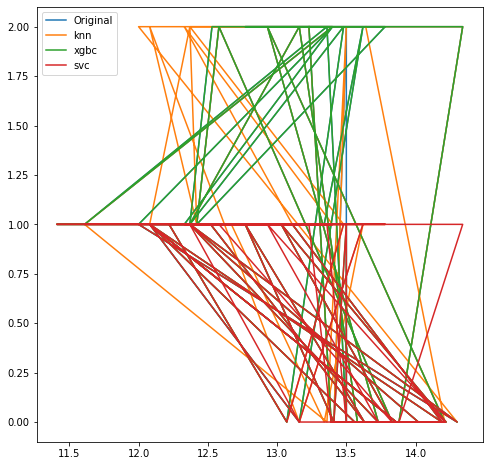

In [22]:
estimators=[('knn',KNeighborsClassifier(n_neighbors=5,n_jobs=1)),
            ('xgbc',XGBClassifier(random_state=0,n_jobs=1,learning_rate=0.1,n_estimators=100,max_depth=3)),
            ('svc',SVC(C=1,gamma=1e-6))]

plt.figure(figsize=(8,8))
plt.plot(xte[0],yte,label='Original')

for est in estimators:
    est[1].fit(xtr,ytr)
    print(est[1].score(xte,yte))
    ypr=est[1].predict(xte)
    plt.plot(xte[0],ypr,label=est[0])

plt.legend()